In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('data/train.csv', index_col='ID')
test = pd.read_csv('data/test.csv', index_col='ID')

In [4]:
train.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,

First, v91 == v107 so delete v107

In [5]:
train.drop('v107', axis=1, inplace=True)
test.drop('v107', axis=1, inplace=True)

In [6]:
catcols = train.columns[train.dtypes == 'O']

In [7]:
for col in catcols:
    print(col, '\t', len(train.loc[:, col].unique()))
    vmap = dict([(train.loc[:, col].unique()[i], i) for i in range(len(train.loc[:, col].unique()))])
    train.loc[:, col + 'n'] = train.loc[:, col].map(vmap)
    test.loc[:, col + 'n'] = test.loc[:, col].map(vmap)

v3 	 4
v22 	 18211
v24 	 5
v30 	 8
v31 	 4
v47 	 10
v52 	 13
v56 	 123
v66 	 3
v71 	 9
v74 	 3
v75 	 4
v79 	 18
v91 	 8
v110 	 3
v112 	 23
v113 	 37
v125 	 91


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()

In [10]:
numcfeats = train.columns[train.dtypes == 'int64'] - ['target', 'v22n']

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [11]:
train_cat = ohe.fit_transform(train.loc[:, numcfeats]).toarray()

In [12]:
ohe.transform(test.loc[:, numcfeats].fillna(0))

<114393x409 sparse matrix of type '<class 'numpy.float64'>'
	with 2402253 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
floatfeats = train.columns[train.dtypes == 'float64']

In [15]:
sc = StandardScaler()

In [16]:
train_fl = sc.fit_transform(train[floatfeats].fillna(train[floatfeats].mean()))

In [18]:
train_all_lr = np.hstack((train_fl, train_cat))

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [20]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [.0001, .001, .01, .1, 1., 10., 100., 1000., 10000.],
    'random_state': [42]
}

In [21]:
gs = GridSearchCV(LogisticRegression(), lr_params, scoring='log_loss', n_jobs=10, cv=5)

In [ ]:
gs.fit(train_all_lr, train.target.values)

In [24]:
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-0.48324381021


In [27]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [.1, .3, .5, .7, .9],
    'random_state': [42]
}

In [28]:
gs = GridSearchCV(LogisticRegression(), lr_params, scoring='log_loss', n_jobs=10, cv=5)

In [29]:
gs.fit(train_all_lr, train.target.values)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=10,
       param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9], 'penalty': ['l1', 'l2'], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [30]:
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
-0.483159349119


In [33]:
train_fl.shape

(114321, 108)

In [50]:
floatfeats[(gs.best_estimator_.coef_)[0][:108] != 0]

Index(['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v13',
       'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v21', 'v23', 'v26', 'v27',
       'v28', 'v36', 'v37', 'v40', 'v43', 'v44', 'v45', 'v46', 'v48', 'v49',
       'v50', 'v51', 'v53', 'v54', 'v55', 'v57', 'v58', 'v59', 'v61', 'v63',
       'v65', 'v68', 'v70', 'v76', 'v78', 'v80', 'v81', 'v82', 'v84', 'v85',
       'v86', 'v88', 'v89', 'v90', 'v93', 'v94', 'v95', 'v97', 'v98', 'v99',
       'v100', 'v101', 'v102', 'v103', 'v105', 'v108', 'v109', 'v111', 'v114',
       'v115', 'v117', 'v119', 'v120', 'v121', 'v123', 'v127', 'v128', 'v131'],
      dtype='object')

In [51]:
import seaborn as sns; sns.set()

([<matplotlib.axis.XTick at 0x7f834119b160>,
 <a list of 108 Text xticklabel objects>)

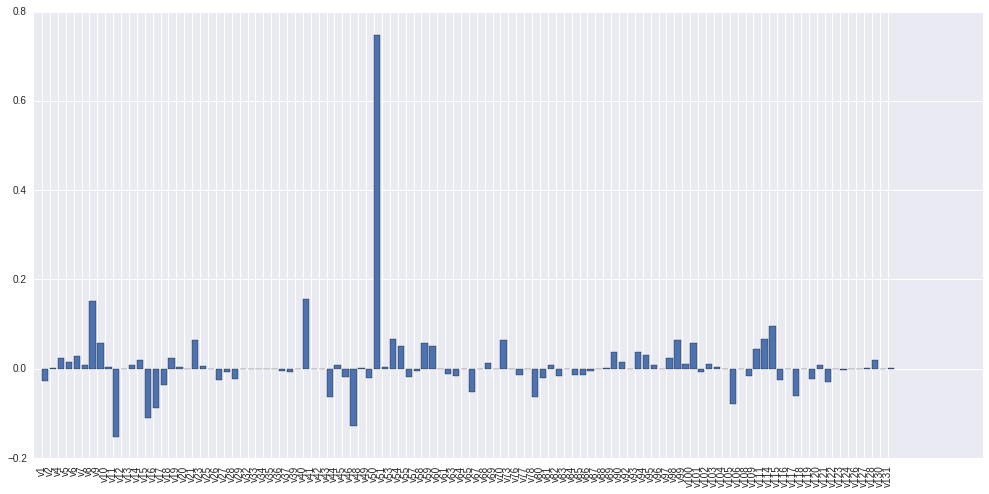

In [72]:
plt.figure(figsize=(17, 8))
plt.bar(list(range(1, 109)), (gs.best_estimator_.coef_)[0][:108])
plt.xticks(list(range(1, 109)), floatfeats.values, rotation='vertical')

In [73]:
test_fl = sc.transform(test[floatfeats].fillna(train[floatfeats].mean()))

In [75]:
test_cat = ohe.transform(test.loc[:, numcfeats].fillna(0)).toarray()

In [76]:
test_all_lr = np.hstack((test_fl, test_cat))

In [77]:
clf = LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
clf.fit(train_all_lr, train.target.values)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
preds = clf.predict_proba(test_all_lr)

In [82]:
sub = pd.read_csv('data/sample_submission.csv', index_col='ID')

In [83]:
sub.head()

,PredictedProb
ID,
0,0.5
1,0.5
2,0.5
7,0.5
10,0.5


In [84]:
sub.PredictedProb = preds[:, 1]

In [87]:
sub.to_csv('submission/init_logreg.csv', index_label='ID')

In [89]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [91]:
cross_val_score(RandomForestClassifier(n_estimators=5000, n_jobs=12, random_state=42), 
                train_all_lr, train.target.values, scoring='log_loss', n_jobs=1)

array([-0.47160077, -0.47081575, -0.46995571])

In [92]:
from sklearn.cross_validation import StratifiedKFold

In [93]:
skf = StratifiedKFold(train.target.values, n_folds=3)

In [95]:
X = ohe.transform(train.loc[:, numcfeats])
y = train.target.values

In [97]:
from fastFM.mcmc import FMClassification
from sklearn.metrics import log_loss

In [104]:
losses = []
for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = FMClassification(n_iter=100, rank=10)
    preds = clf.fit_predict_proba(X_train, y_train, X_test)
    print(log_loss(y_test, preds))
    losses.append(log_loss(y_test, preds))

0.562912013039
0.551108045538
0.552802194666


In [106]:
import xgboost as xgb

In [107]:
train_xg = np.hstack((train.loc[:, floatfeats].values, train_cat))

In [108]:
from sklearn.cross_validation import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(train_xg, y, test_size=0.33, random_state=42)
traind = xgb.DMatrix(X_train, y_train)
vald = xgb.DMatrix(X_test, y_test)
watchlist = ((traind, 'train'), (vald, 'validation'))

In [118]:
def logloss(yhat, y):
    # y = y.values
    y = y.get_label()
    return 'logloss', log_loss(y, yhat)

In [240]:
params = {
    'nthread': 12,
    'eval_metric': 'logloss',
    'eta': .01,
    'max_depth': 11,
    'subsample': .96,
    'colsample_bytree': .45,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

In [139]:
gbm = xgb.train(params, traind, num_boost_round=5000, feval=logloss, 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True)

In [241]:
dtrain = xgb.DMatrix(train_xg, y)
dtest = xgb.DMatrix(np.hstack((test.loc[:, floatfeats].values, test_cat)))

In [242]:
watchlist2 = ((dtrain, 'train'))

In [243]:
gbm = xgb.train(params, dtrain, num_boost_round=2500, feval=logloss, 
          evals=watchlist, verbose_eval=True)

In [244]:
preds = gbm.predict(dtest)

In [245]:
sub.PredictedProb = preds

In [246]:
sub.to_csv('submission/init_xgb4.csv', index_label='ID')

In [152]:
from sklearn.ensemble import ExtraTreesClassifier

In [153]:
cross_val_score(ExtraTreesClassifier(n_estimators=850,max_features= 60,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 40, min_samples_leaf= 2, n_jobs = -1), 
                train_all_lr, train.target.values, scoring='log_loss', n_jobs=1)

array([-0.46514856, -0.4630443 , -0.46244584])

## Category target encoding

In [193]:
[(i, train.loc[:, i].unique()) for i in numcfeats]

[('v110n', array([0, 1, 2])),
 ('v112n',
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22])),
 ('v113n',
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36])),
 ('v125n',
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90])),
 ('v129', array([ 0,  2,  1,  4,  3,  5,  7,  6, 11,  8])),
 ('v24n', array([0, 1, 2, 3, 4])),
 ('v30n', array([0, 1, 2, 3, 4, 5, 6, 7])),
 ('v31n', array([0, 1, 2, 3])),
 ('v38', array([ 0,  4,  1,  2,  6,  5,  8,  3, 10,  9

In [190]:
train.index[train_index]

Int64Index([ 45122,  45124,  45130,  45138,  45140,  45155,  45172,  45180,
             45184,  45191,
            ...
            228699, 228701, 228702, 228705, 228707, 228708, 228710, 228711,
            228712, 228713],
           dtype='int64', name='ID', length=91456)

In [200]:
skf = StratifiedKFold(train.target.values, n_folds=5)

for feat in numcfeats:
    train.loc[:, feat+'c'] = np.zeros(train.shape[0])
    #losses = []
    for train_index, test_index in skf:
        
        X_train = train.loc[train.index[train_index], [feat, 'target']]
        d = X_train.groupby(by=feat).mean()
        #print(d)
        predvec = train.loc[train.index[test_index], feat]
        predvec = predvec.map(dict([(i, d.loc[i, 'target']) for i in d.index]))
        train.loc[train.index[test_index], feat+'c'] = predvec.values
        #y_train, y_test = y[train_index], y[test_index]
        
    predvec = test.loc[:, feat]
    predvec = predvec.map(dict([(i, d.loc[i, 'target']) for i in d.index]))
    test.loc[:, feat+'c'] = predvec.values

In [201]:
train_cat_en = train.loc[:, [i+'c' for i in numcfeats]]
test_cat_en = test.loc[:, [i+'c' for i in numcfeats]]

In [252]:
train_xg_en = np.hstack((train.loc[:, floatfeats].values, train_cat_en))
X_train, X_test, y_train, y_test = train_test_split(train_xg_en, y, test_size=0.33, random_state=42)
traind = xgb.DMatrix(X_train, y_train)
vald = xgb.DMatrix(X_test, y_test)
watchlist = ((traind, 'train'), (vald, 'validation'))

In [275]:
params = {
    'nthread': 12,
    'eval_metric': 'logloss',
    'eta': .05,
    'max_depth': 7,
    'subsample': .9,
    'colsample_bytree': .9,
    'colsample_bylevel': .6,
    'lambda': 1,
    'alpha': 0.1,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

In [276]:
gbm = xgb.train(params, traind, num_boost_round=5000, feval=logloss, 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True)

KeyboardInterrupt: 

In [283]:
train_et = train_xg.copy()

In [286]:
train_et[np.isnan(train_et)] = -999*np.ones(train_et[np.isnan(train_et)].shape[0])

In [288]:
cross_val_score(ExtraTreesClassifier(n_estimators=850,max_features= 60,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 40, min_samples_leaf= 2, n_jobs = -1), 
                train_et, 
                train.target.values, cv=4, scoring='log_loss', n_jobs=1)

array([-0.46577399, -0.46432072, -0.46439712, -0.46472779])

In [289]:
train_et_en = np.hstack((train.loc[:, floatfeats].values, train_cat_en))
train_et_en[np.isnan(train_et_en)] = -999*np.ones(train_et_en[np.isnan(train_et_en)].shape[0])

In [290]:
cvse = cross_val_score(ExtraTreesClassifier(n_estimators=850,max_features= 60,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 40, min_samples_leaf= 2, n_jobs = -1), 
                train_et_en, 
                train.target.values, cv=4, scoring='log_loss', n_jobs=1)

In [291]:
print(cvse)

[-0.46321689 -0.46627341 -0.46760721 -0.46256804]


In [292]:
cvst1 = cross_val_score(ExtraTreesClassifier(n_estimators=850,max_features= 160,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 60, min_samples_leaf= 2, n_jobs = -1), 
                train_et, 
                train.target.values, cv=4, scoring='log_loss', n_jobs=1)

In [293]:
print(cvst1)

[-0.4640629  -0.46451892 -0.46515825 -0.46362492]


In [295]:
cvse1 = cross_val_score(ExtraTreesClassifier(n_estimators=850,max_features= 60,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 60, min_samples_leaf= 2, n_jobs = -1), 
                train_et_en, 
                train.target.values, cv=4, scoring='log_loss', n_jobs=1)

In [296]:
print(cvse1)

[-0.46268842 -0.46565459 -0.46777533 -0.46231126]


In [297]:
np.mean(cvse), np.mean(cvse1)

(-0.46491638760046849, -0.46460739967985487)

In [298]:
train_e = train.copy()
test_e = test.copy()

In [300]:
train_e = train_e.drop(['target','v8','v23','v25','v31','v36','v37','v46',
                        'v51','v53','v54','v63','v73','v75','v79','v81',
                        'v82','v89','v92','v95','v105','v108','v109',
                        'v110','v116','v117','v118','v119','v123','v124','v128'],axis=1)
test_e = test_e.drop(['v8','v23','v25','v31','v36','v37','v46','v51','v53',
                      'v54','v63','v73','v75','v79','v81','v82','v89','v92',
                      'v95','v105','v108','v109','v110','v116',
                      'v117','v118','v119','v123','v124','v128'],axis=1)

In [304]:
train.loc[:, train_e.columns.values] = train_e
test.loc[:, test_e.columns.values] = test_e

In [305]:
for (train_name, train_series), (test_name, test_series) in zip(train_e.iteritems(),test_e.iteritems()):
    if train_series.dtype == 'O':
        #for objects: factorize
        train_e[train_name], tmp_indexer = pd.factorize(train_e[train_name])
        test_e[test_name] = tmp_indexer.get_indexer(test_e[test_name])
        #but now we have -1 values (NaN)
    else:
        #for int or float: fill NaN
        tmp_len = len(train_e[train_series.isnull()])
        if tmp_len>0:
            #print "mean", train_series.mean()
            train_e.loc[train_series.isnull(), train_name] = -999 
        #and Test
        tmp_len = len(test_e[test_series.isnull()])
        if tmp_len>0:
            test_e.loc[test_series.isnull(), test_name] = -999

In [306]:
train_e.columns.values

array(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12',
       'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v24', 'v26', 'v27', 'v28', 'v29', 'v30', 'v32', 'v33',
       'v34', 'v35', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44',
       'v45', 'v47', 'v48', 'v49', 'v50', 'v52', 'v55', 'v56', 'v57',
       'v58', 'v59', 'v60', 'v61', 'v62', 'v64', 'v65', 'v66', 'v67',
       'v68', 'v69', 'v70', 'v71', 'v72', 'v74', 'v76', 'v77', 'v78',
       'v80', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v90', 'v91',
       'v93', 'v94', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102',
       'v103', 'v104', 'v106', 'v111', 'v112', 'v113', 'v114', 'v115',
       'v120', 'v121', 'v122', 'v125', 'v126', 'v127', 'v129', 'v130',
       'v131', 'v3n', 'v22n', 'v24n', 'v30n', 'v31n', 'v47n', 'v52n',
       'v56n', 'v66n', 'v71n', 'v74n', 'v75n', 'v79n', 'v91n', 'v110n',
       'v112n', 'v113n', 'v125n', 'v110nc', 'v112nc', 'v113nc', 'v125nc',
   

In [311]:
cross_val_score(ExtraTreesClassifier(n_estimators=2850,max_features= 60,
                                     criterion= 'entropy',min_samples_split= 4,
                            max_depth= 40, min_samples_leaf= 2, n_jobs = -1), 
                train_e[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12',
       'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v24', 'v26', 'v27', 'v28', 'v29', 'v30', 'v32', 'v33',
       'v34', 'v35', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44',
       'v45', 'v47', 'v48', 'v49', 'v50', 'v52', 'v55', 'v56', 'v57',
       'v58', 'v59', 'v60', 'v61', 'v62', 'v64', 'v65', 'v66', 'v67',
       'v68', 'v69', 'v70', 'v71', 'v72', 'v74', 'v76', 'v77', 'v78',
       'v80', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v90', 'v91',
       'v93', 'v94', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102',
       'v103', 'v104', 'v106', 'v111', 'v112', 'v113', 'v114', 'v115',
       'v120', 'v121', 'v122', 'v125', 'v126', 'v127', 'v129', 'v130',
       'v131']], 
                train.target.values, cv=4, scoring='log_loss', n_jobs=1)

array([-0.4559771 , -0.45731554, -0.45884145, -0.45656089])

In [308]:
params = {
    'nthread': 12,
    'eval_metric': 'logloss',
    'eta': .01,
    'max_depth': 11,
    'subsample': .96,
    'colsample_bytree': .45,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

In [309]:
X_train, X_test, y_train, y_test = train_test_split(train_e[['v1', 'v2', 'v3', 
                                'v4', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12',
       'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v24', 'v26', 'v27', 'v28', 'v29', 'v30', 'v32', 'v33',
       'v34', 'v35', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44',
       'v45', 'v47', 'v48', 'v49', 'v50', 'v52', 'v55', 'v56', 'v57',
       'v58', 'v59', 'v60', 'v61', 'v62', 'v64', 'v65', 'v66', 'v67',
       'v68', 'v69', 'v70', 'v71', 'v72', 'v74', 'v76', 'v77', 'v78',
       'v80', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v90', 'v91',
       'v93', 'v94', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102',
       'v103', 'v104', 'v106', 'v111', 'v112', 'v113', 'v114', 'v115',
       'v120', 'v121', 'v122', 'v125', 'v126', 'v127', 'v129', 'v130',
       'v131']], y, test_size=0.33, random_state=42)
traind = xgb.DMatrix(X_train, y_train)
vald = xgb.DMatrix(X_test, y_test)
watchlist = ((traind, 'train'), (vald, 'validation'))

In [310]:
gbm = xgb.train(params, traind, num_boost_round=5000, feval=logloss, 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True)

KeyboardInterrupt: 

In [316]:
train_hol = pd.read_csv('data/train.csv', index_col='ID')

In [318]:
train_pre, holdout = train_test_split(train_hol, test_size=.1, stratify=train_hol.target.values)

In [319]:
train_pre.shape, holdout.shape

((102888, 132), (11433, 132))

In [320]:
train_pre.to_csv('data/train_pre.csv', index='ID')

In [321]:
train_pre.to_csv('data/holdout.csv', index='ID')

In [170]:
d = train.loc[:, ['v3n', 'target']].groupby(by='v3n').mean()

In [177]:
d.iloc[2].values[0]

0.95594713656387664

In [180]:
[(i, d.iloc[i].values[0]) for i in d.index]

[(0, 0.75939557259639734),
 (1, 0.80416546138270173),
 (2, 0.95594713656387664),
 (3, 0.8867924528301887)]

In [184]:
train.loc[:, 'v3n'].map(dict([(i, d.iloc[i].values[0]) for i in d.index]))

ID
3         0.759396
4         0.759396
5         0.759396
6         0.759396
8         0.759396
9         0.759396
12        0.759396
21        0.759396
22        0.804165
23        0.759396
24        0.759396
27        0.759396
28        0.759396
30        0.759396
31        0.759396
32        0.759396
33        0.759396
34        0.759396
35        0.759396
36        0.759396
37        0.759396
39        0.759396
40        0.759396
42        0.759396
43        0.759396
46        0.759396
51        0.759396
52        0.759396
54        0.759396
55        0.759396
            ...   
228655    0.759396
228657    0.759396
228658    0.759396
228659    0.759396
228660    0.759396
228663    0.759396
228666    0.759396
228668    0.759396
228670    0.759396
228671    0.759396
228673    0.759396
228677    0.759396
228680    0.759396
228682    0.759396
228683    0.759396
228684    0.759396
228688    0.759396
228691    0.759396
228695    0.759396
228697    0.759396
228699    0.759396
228701   

In [29]:
ohe.fit_transform(train.loc[:, ['v3n', 'v24n', 'v30n']])

<114321x17 sparse matrix of type '<class 'numpy.float64'>'
	with 342963 stored elements in Compressed Sparse Row format>

In [30]:
train.v3n.shape

(114321,)

In [10]:
v3map = dict([(train.v3.unique()[i], i) for i in range(len(train.v3.unique()))])

In [14]:
train.v3.map(v3map)

ID
3         0
4         0
5         0
6         0
8         0
9         0
12        0
21        0
22        1
23        0
24        0
27        0
28        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
39        0
40        0
42        0
43        0
46        0
51        0
52        0
54        0
55        0
         ..
228655    0
228657    0
228658    0
228659    0
228660    0
228663    0
228666    0
228668    0
228670    0
228671    0
228673    0
228677    0
228680    0
228682    0
228683    0
228684    0
228688    0
228691    0
228695    0
228697    0
228699    0
228701    0
228702    0
228705    0
228707    0
228708    0
228710    0
228711    0
228712    0
228713    0
Name: v3, dtype: int64

In [32]:
train.describe()

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.314476,8.343910e-01,6.780415e-01,6.841238e+0

In [36]:
floats = train.dtypes == 'float64'

v1
v2
v4
v5
v6
v7
v8
v9
v10
v11
v12
v13
v14
v15
v16
v17
v18
v19
v20
v21
v23


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


v25
v26
v27
v28
v29
v32
v33
v34
v35
v36
v37
v39
v40
v41
v42
v43
v44
v45
v46
v48
v49
v50
v51
v53
v54
v55
v57
v58
v59
v60
v61
v63
v64
v65
v67
v68
v69
v70
v73
v76
v77
v78
v80
v81
v82
v83
v84
v85
v86
v87
v88
v89
v90
v92
v93
v94
v95
v96
v97
v98
v99
v100
v101
v102
v103
v104
v105
v106
v108
v109
v111
v114
v115
v116
v117
v118
v119
v120
v121
v122
v123
v124
v126
v127
v128
v130
v131


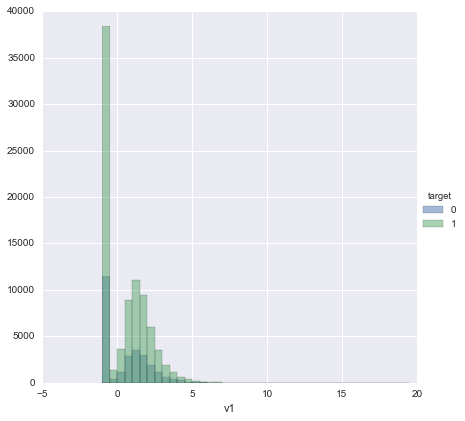

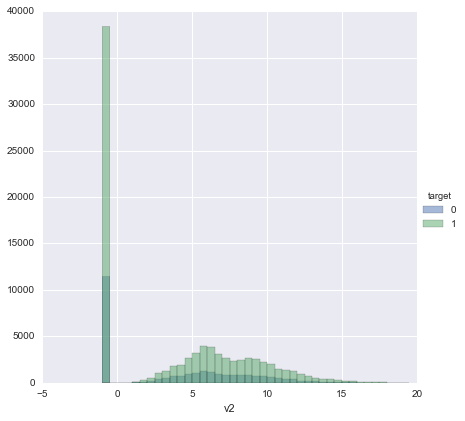

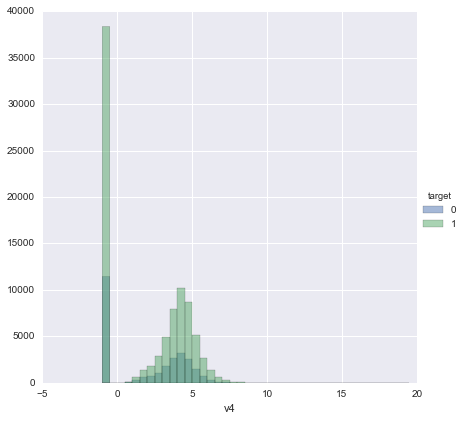

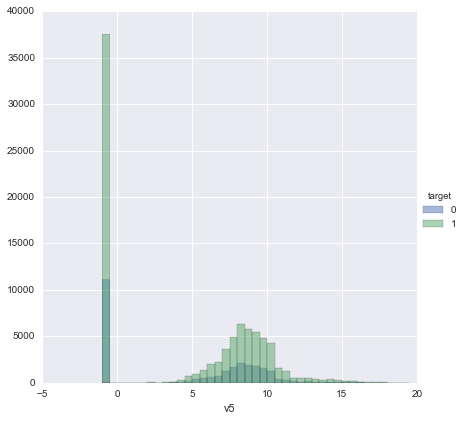

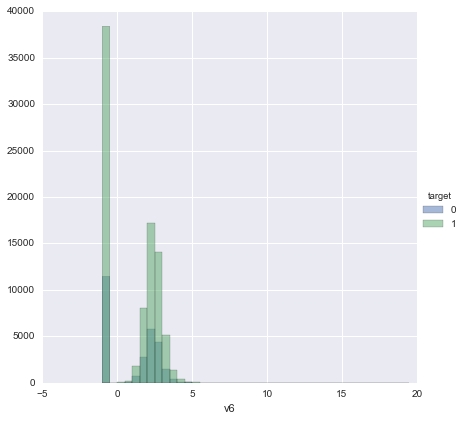

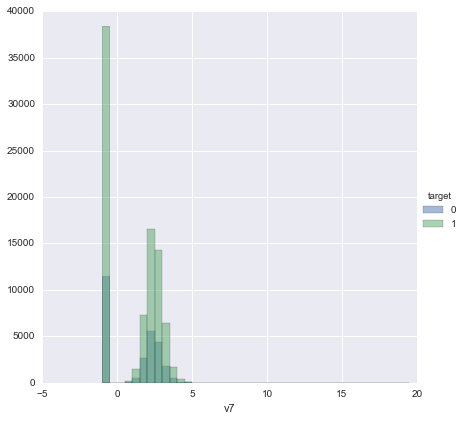

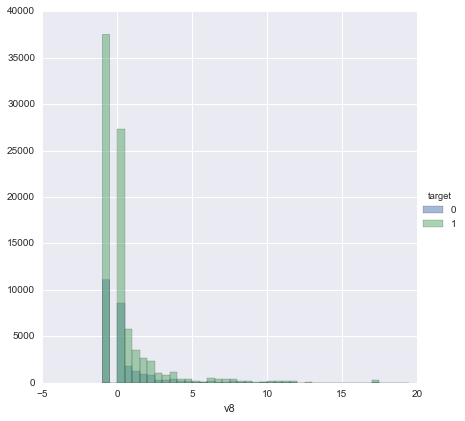

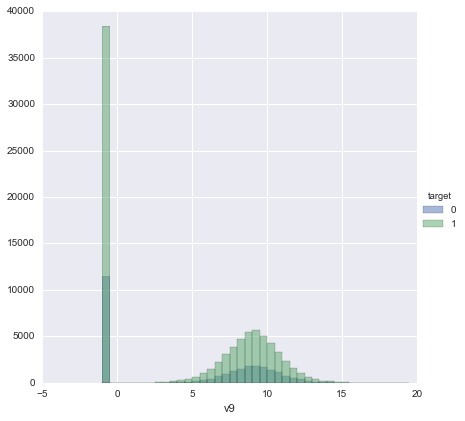

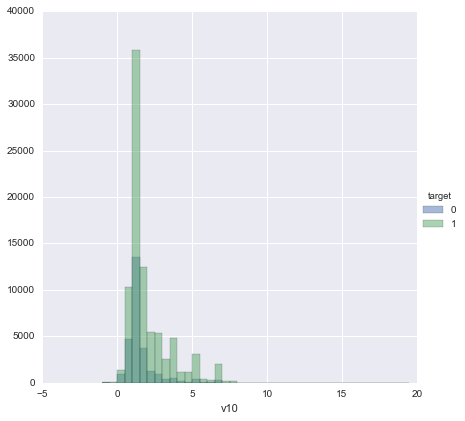

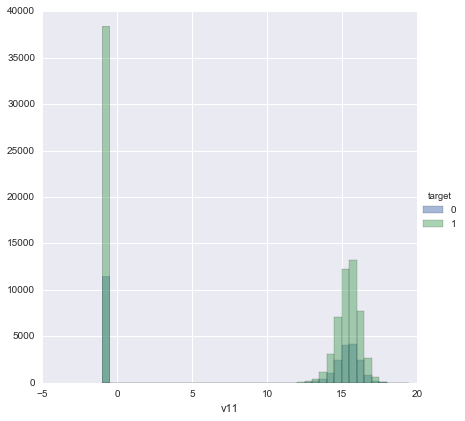

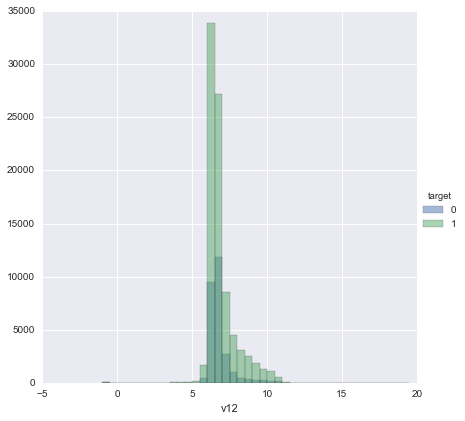

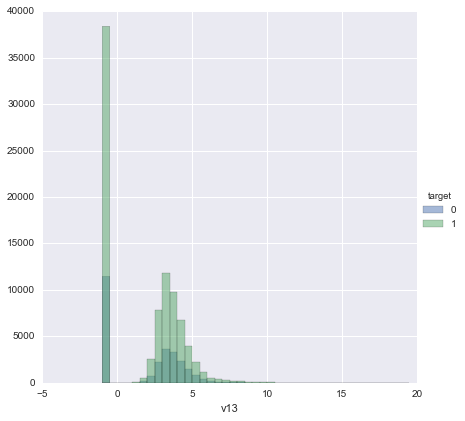

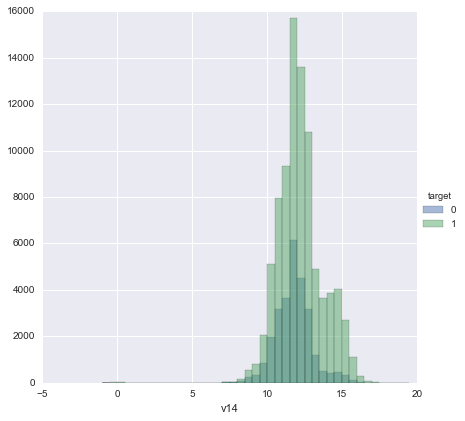

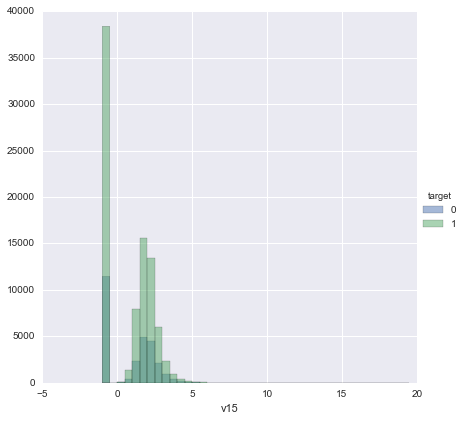

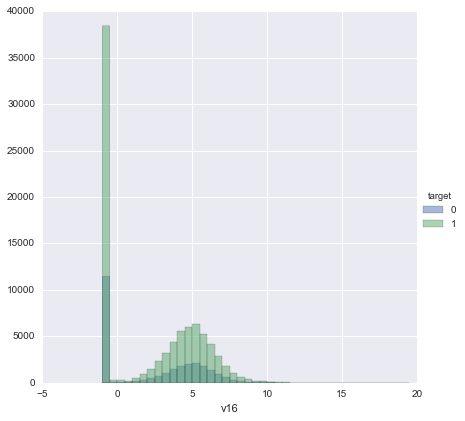

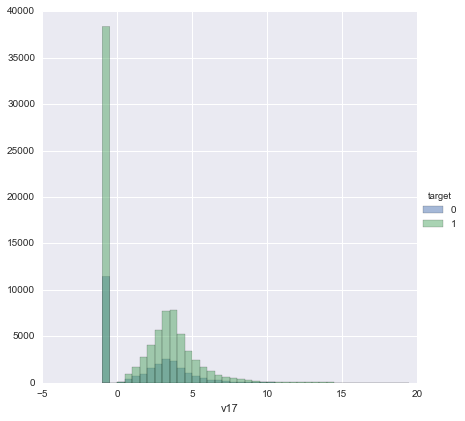

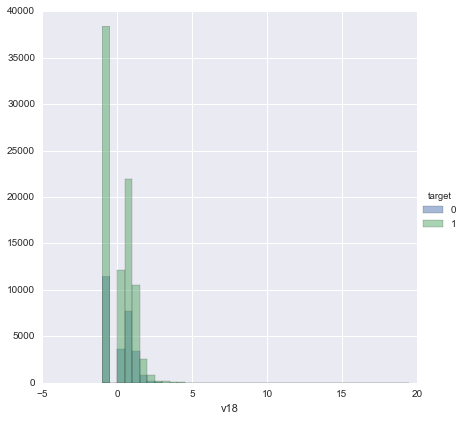

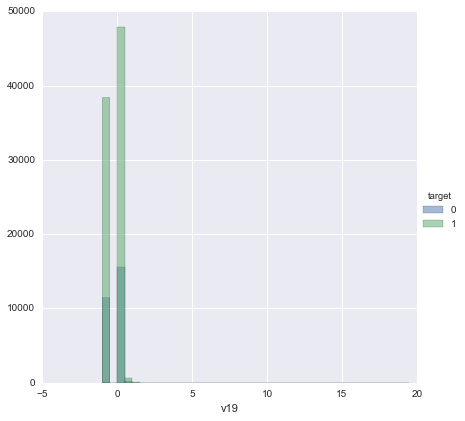

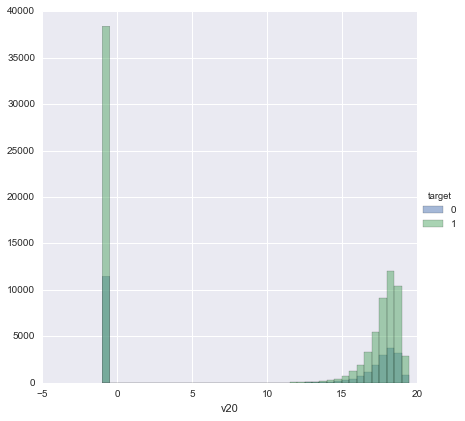

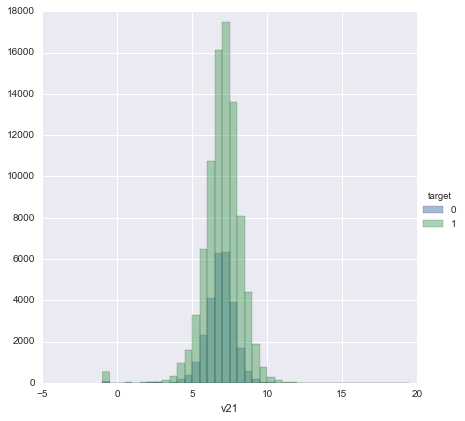

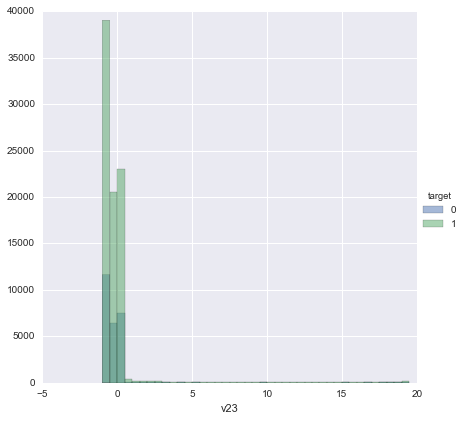

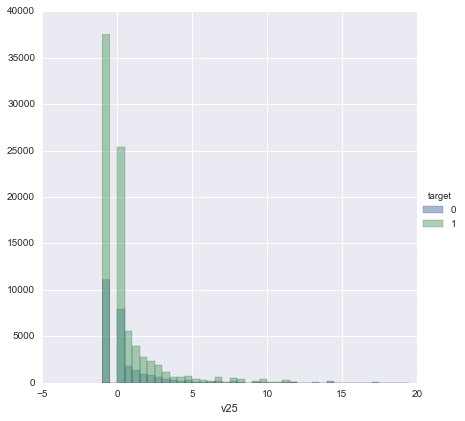

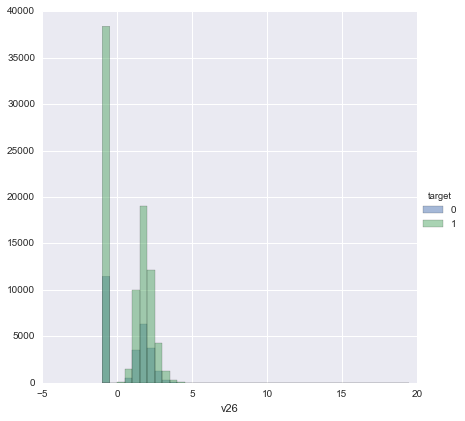

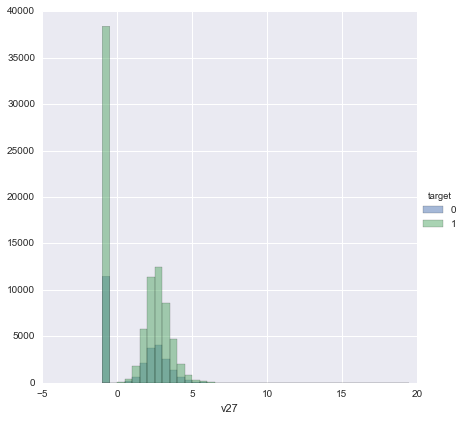

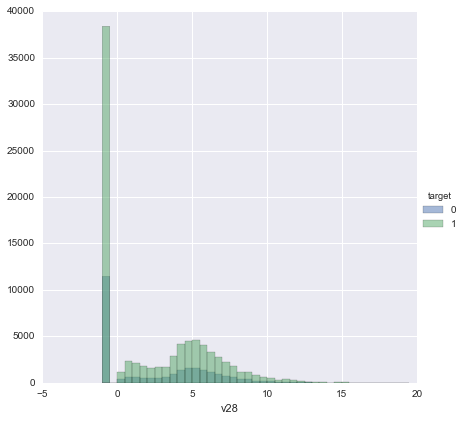

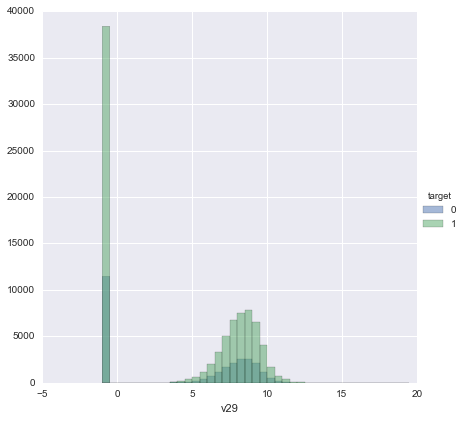

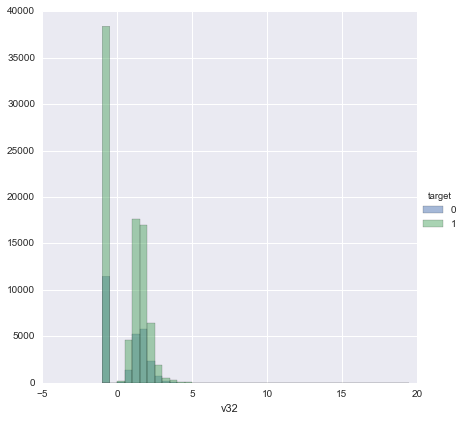

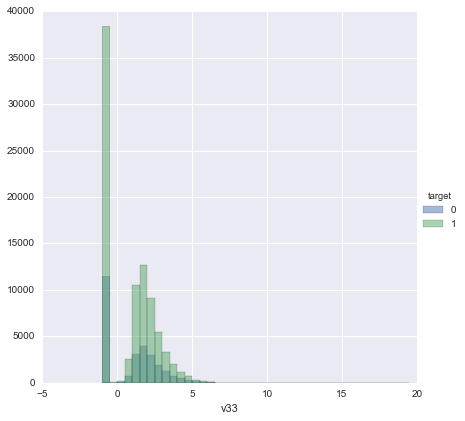

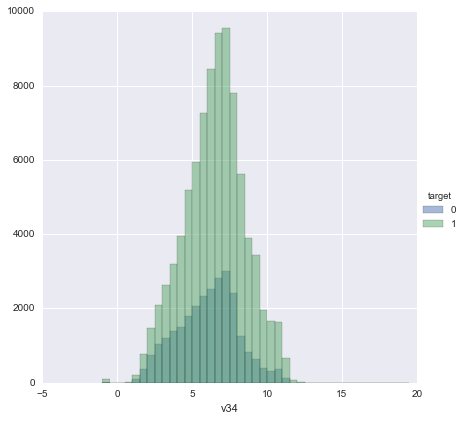

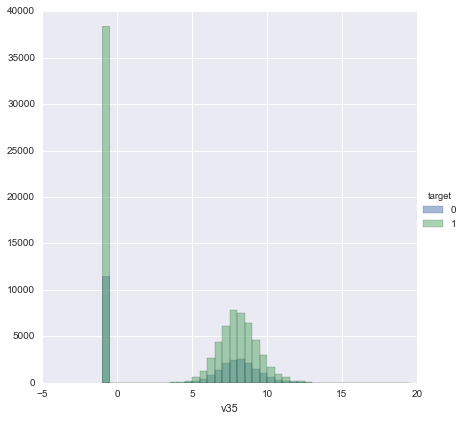

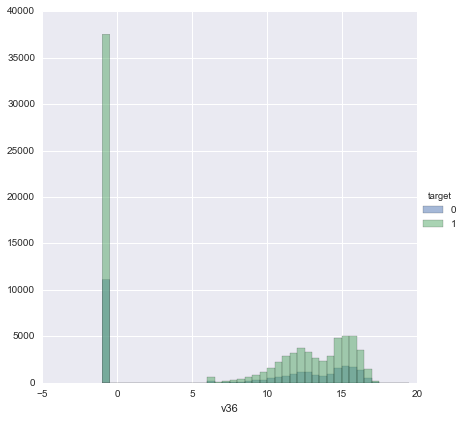

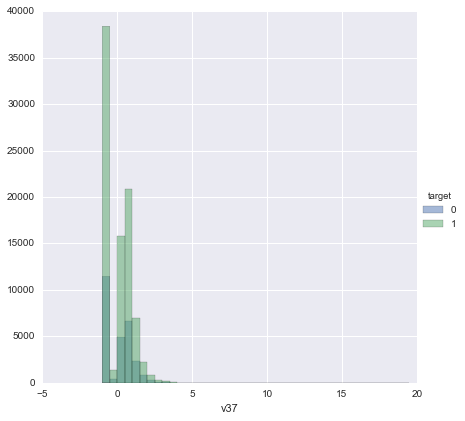

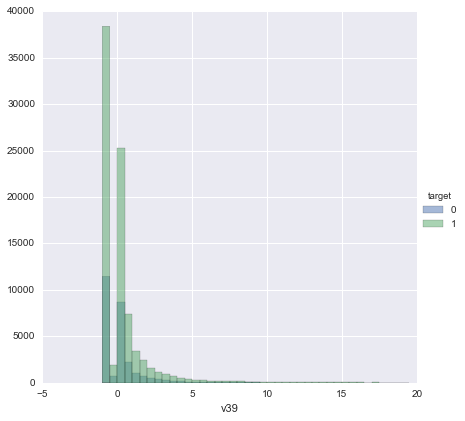

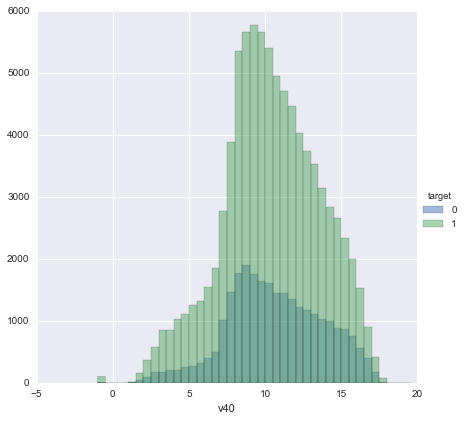

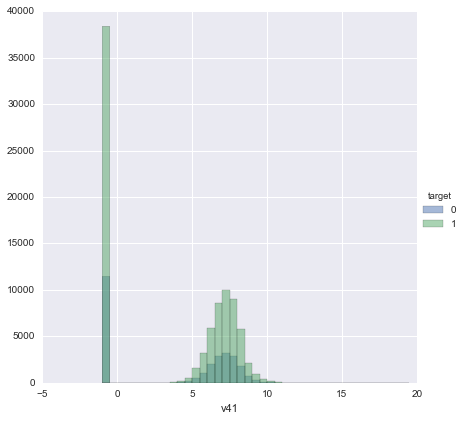

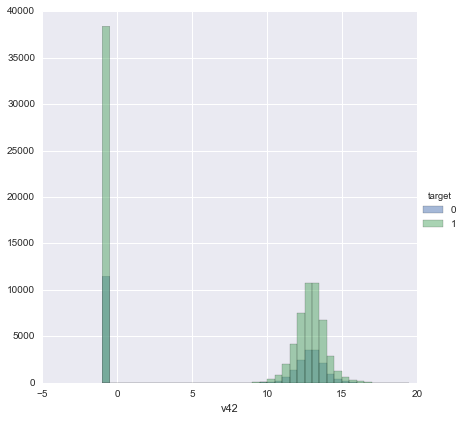

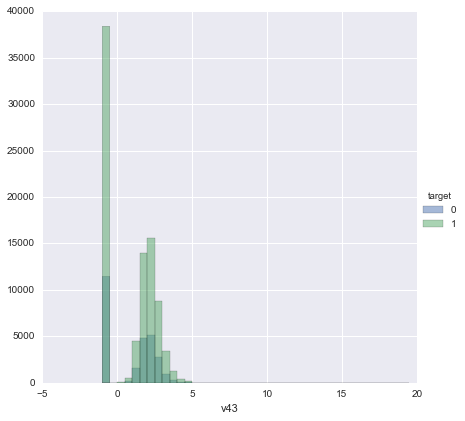

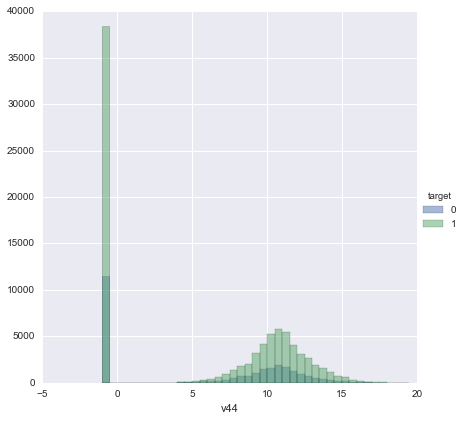

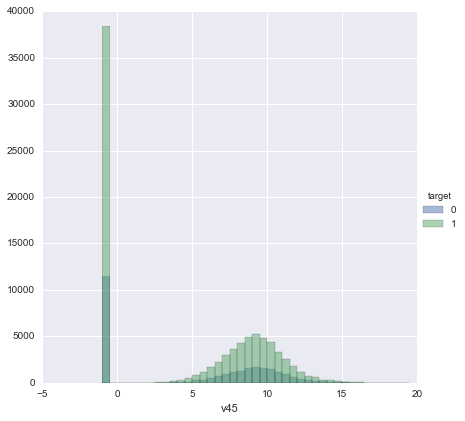

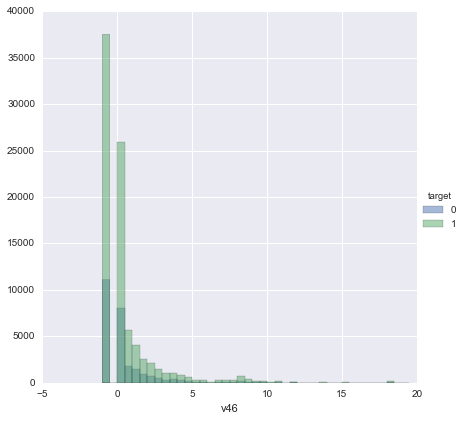

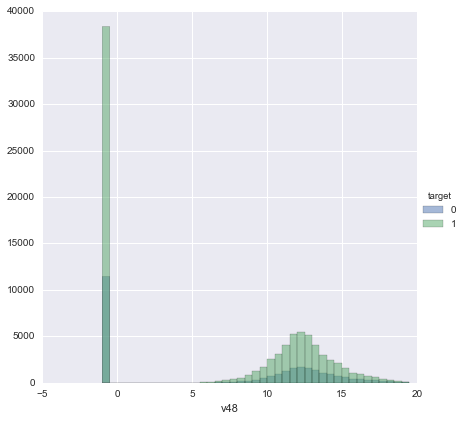

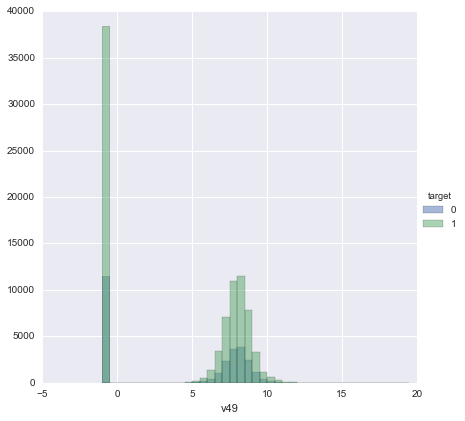

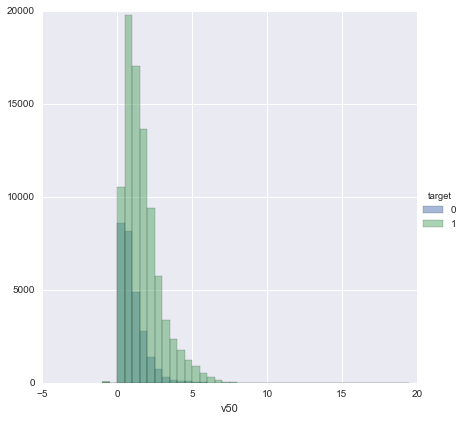

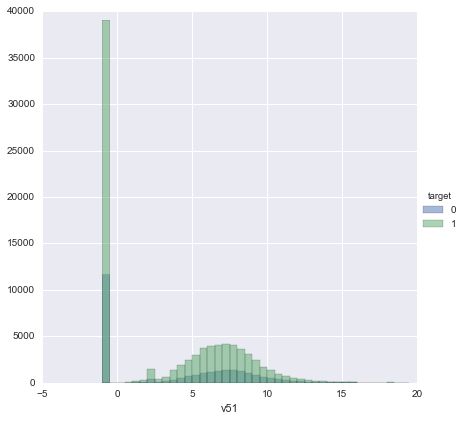

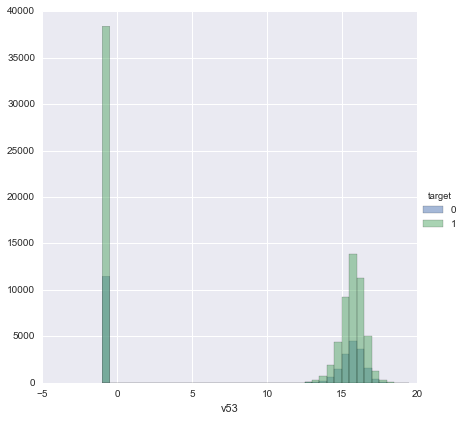

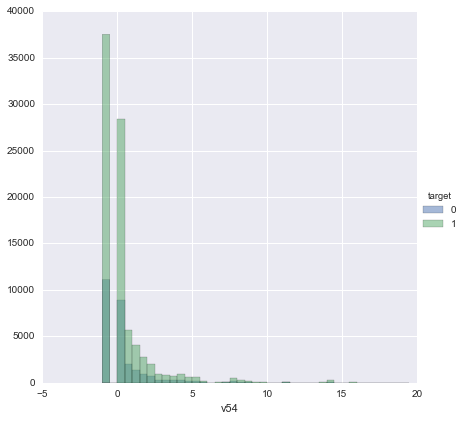

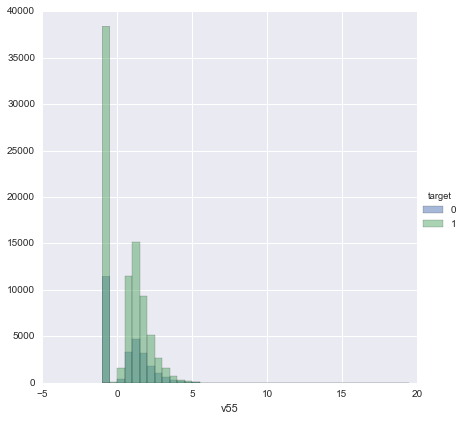

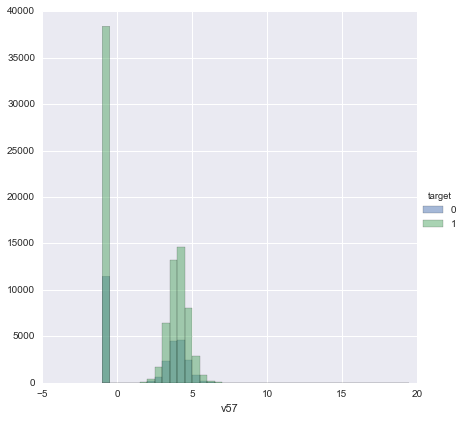

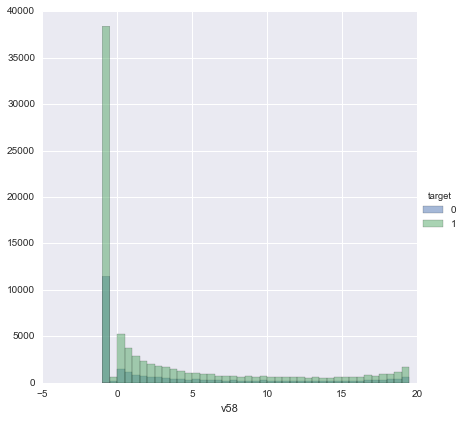

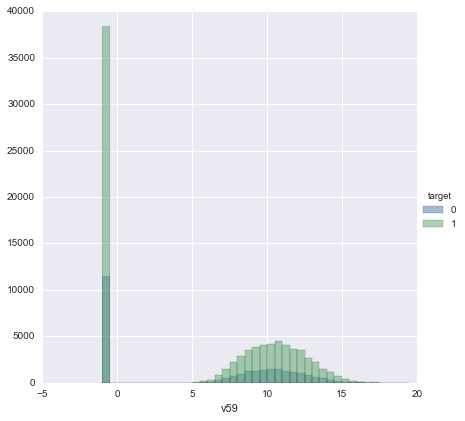

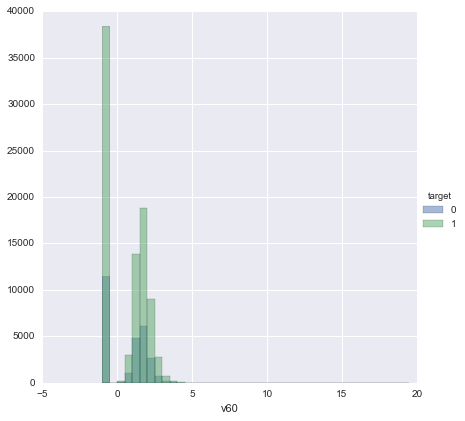

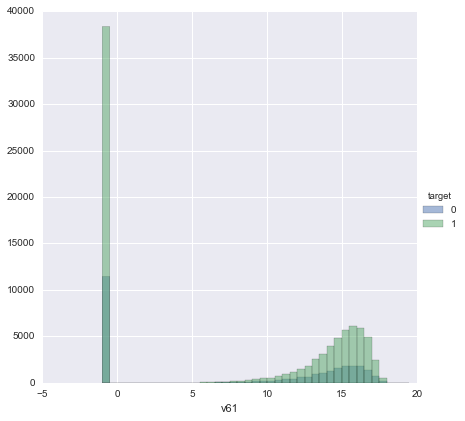

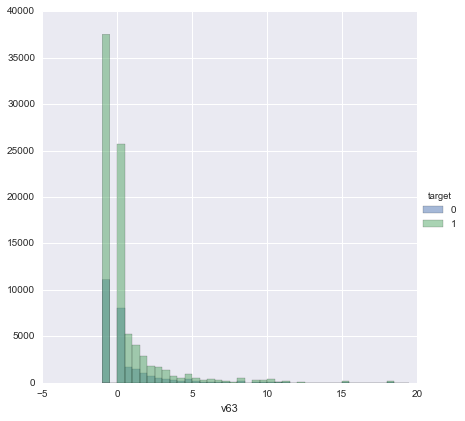

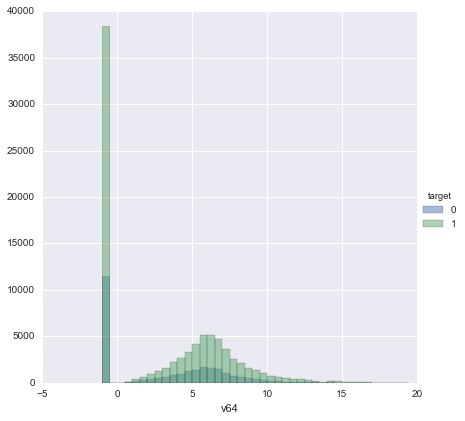

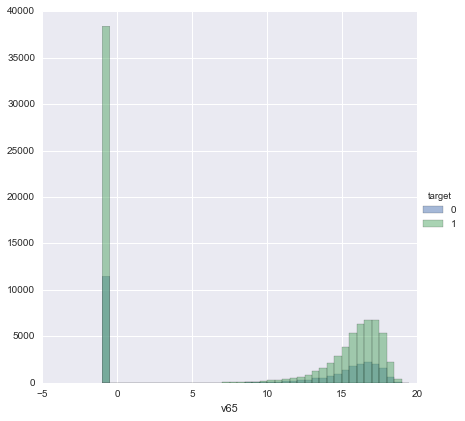

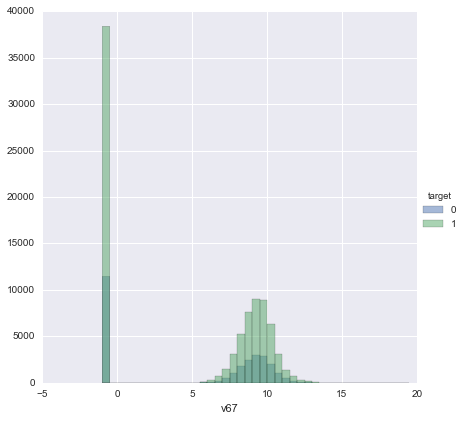

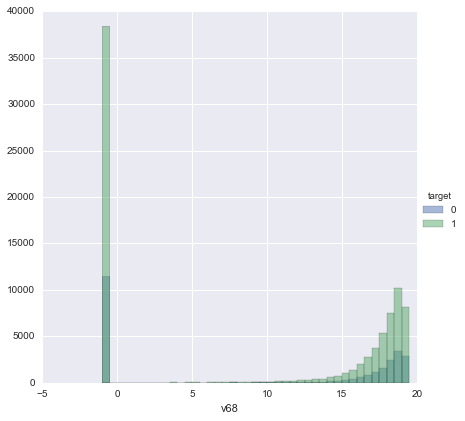

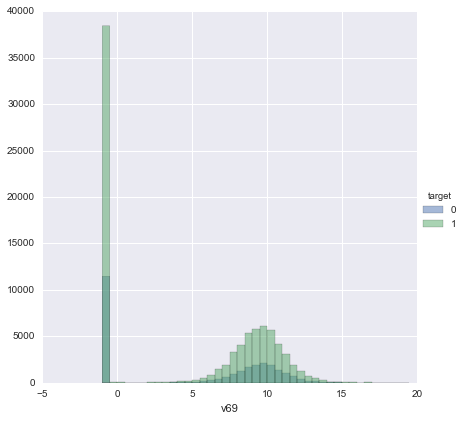

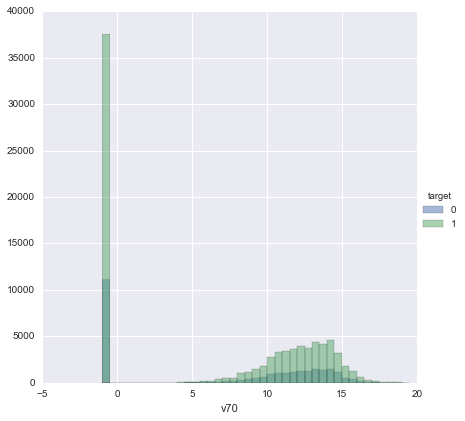

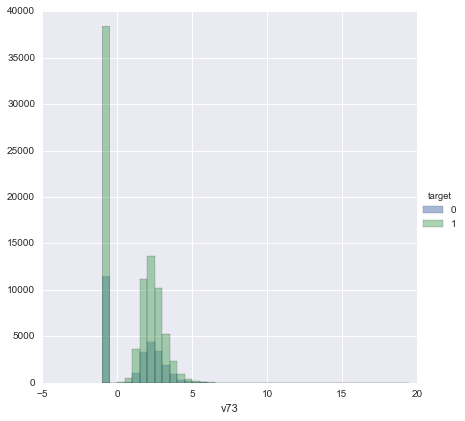

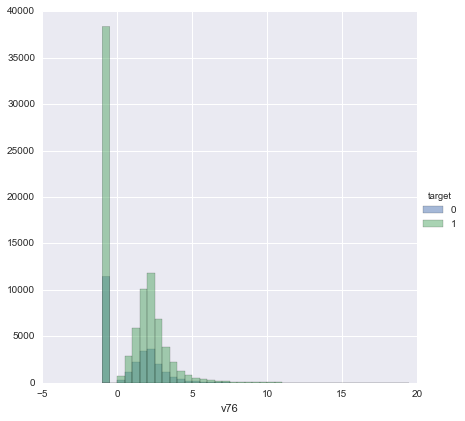

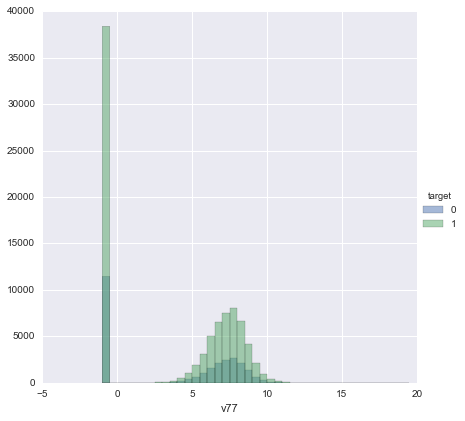

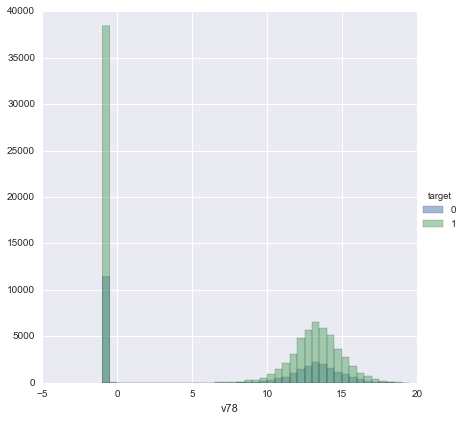

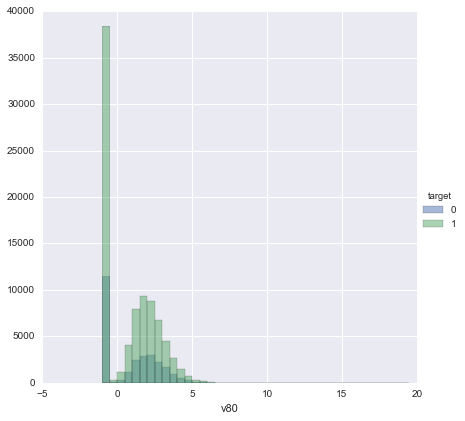

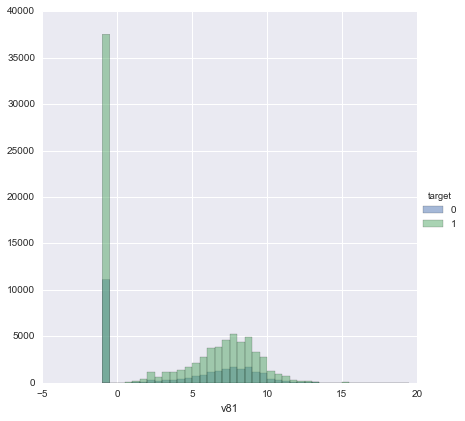

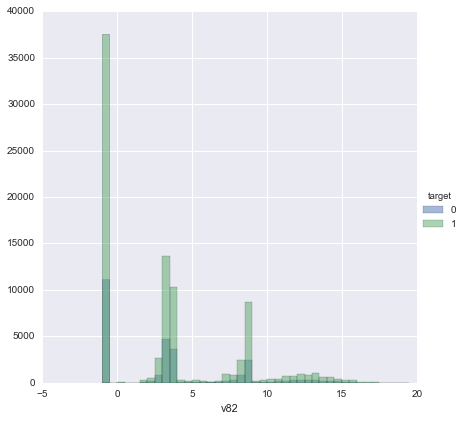

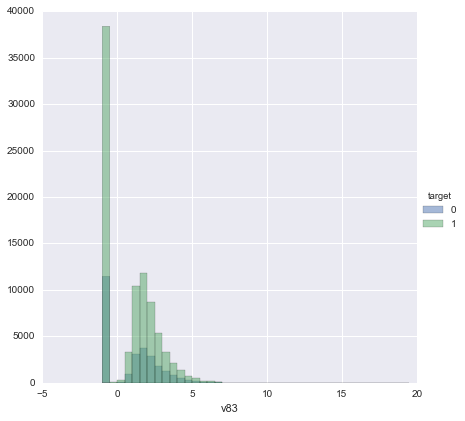

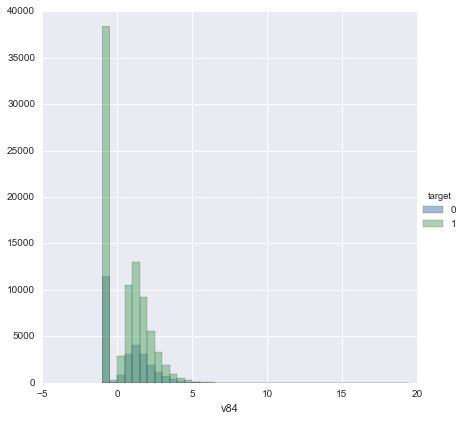

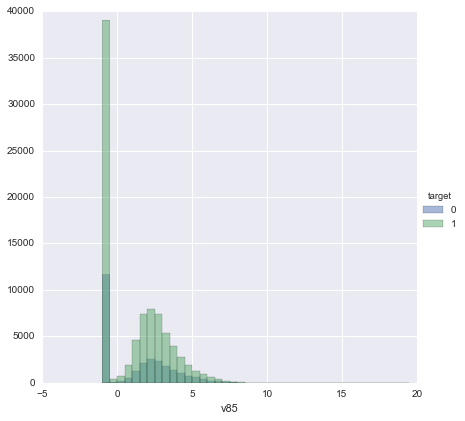

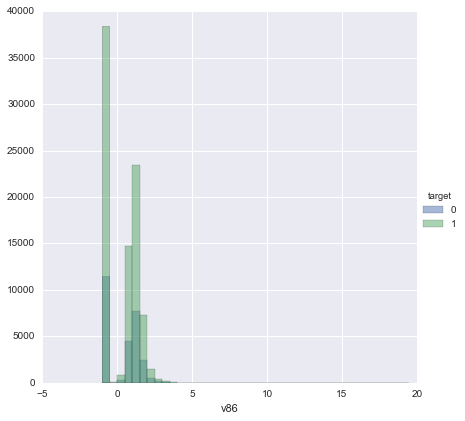

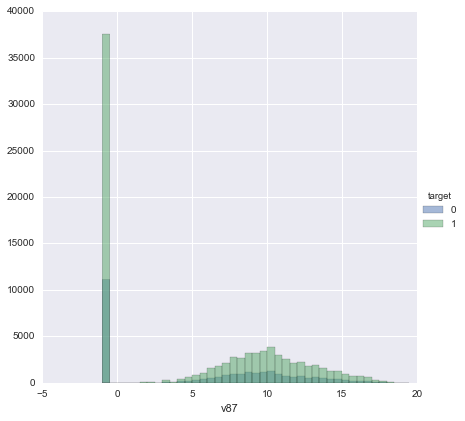

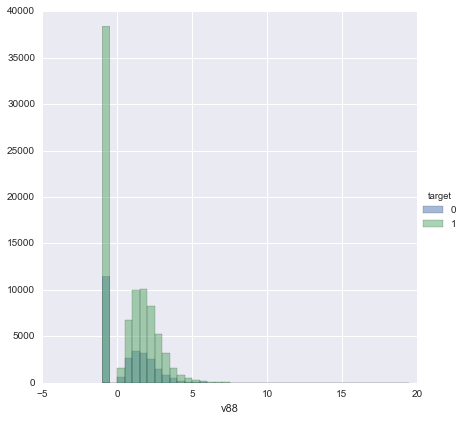

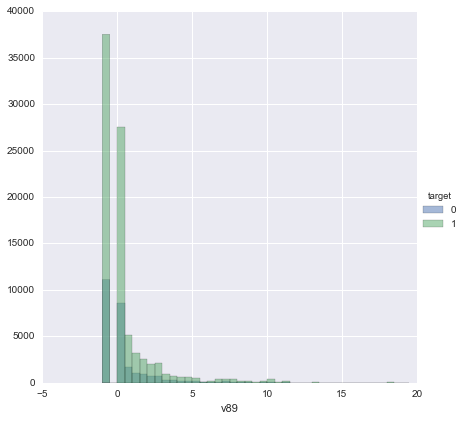

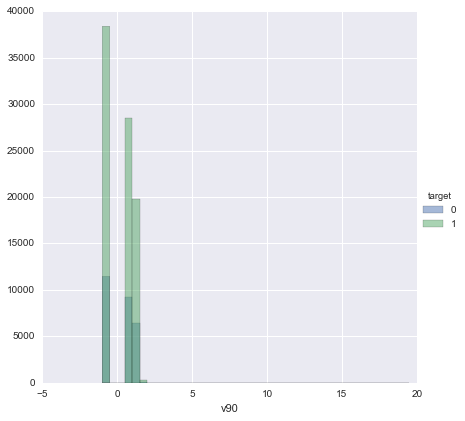

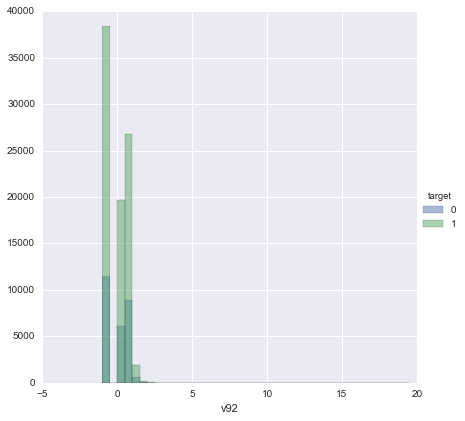

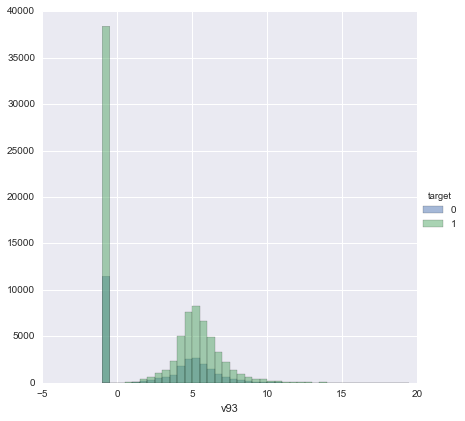

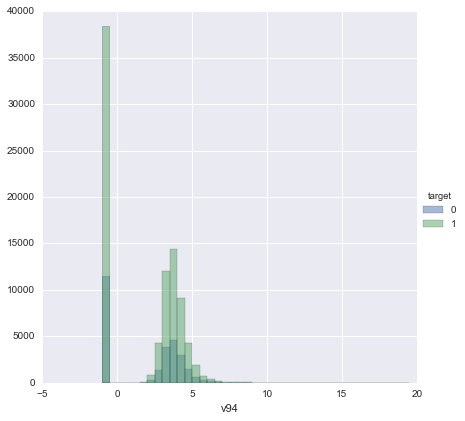

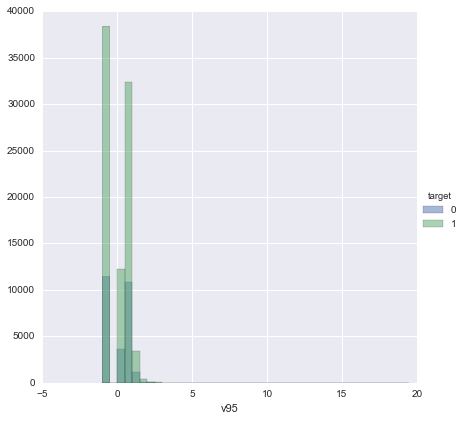

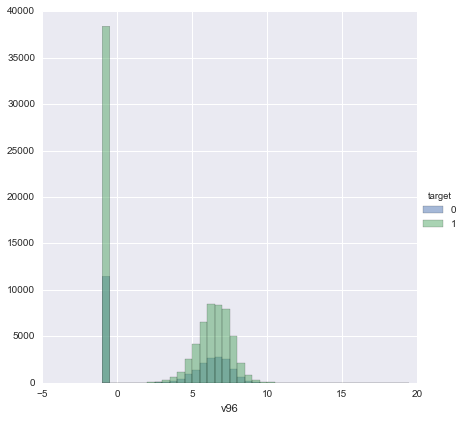

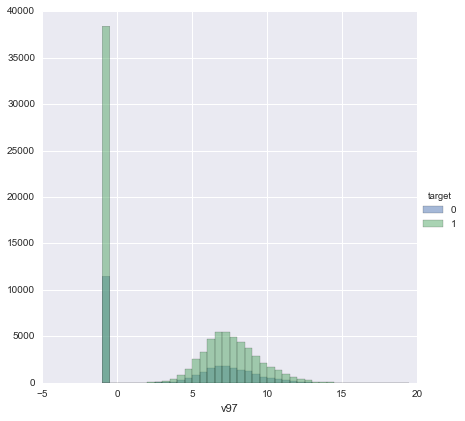

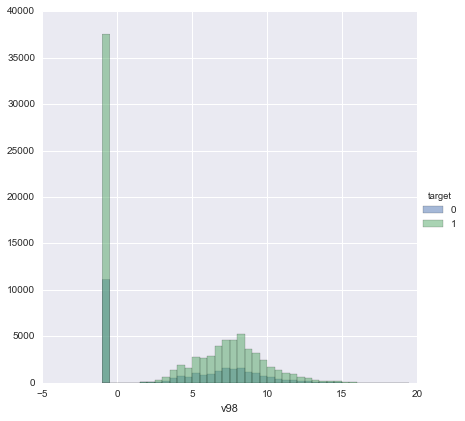

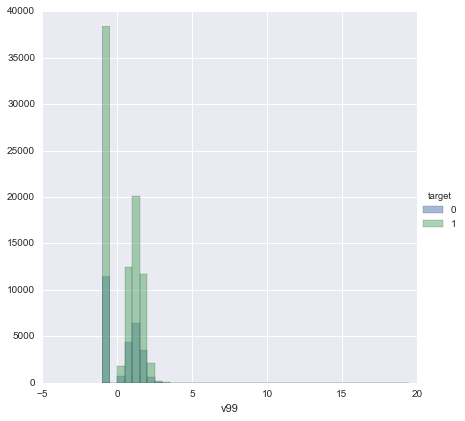

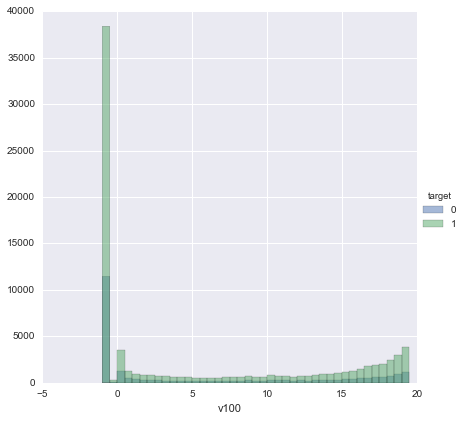

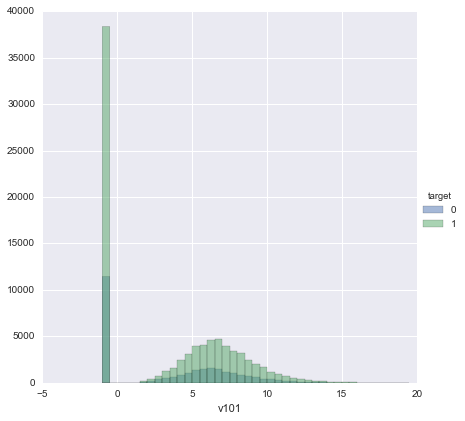

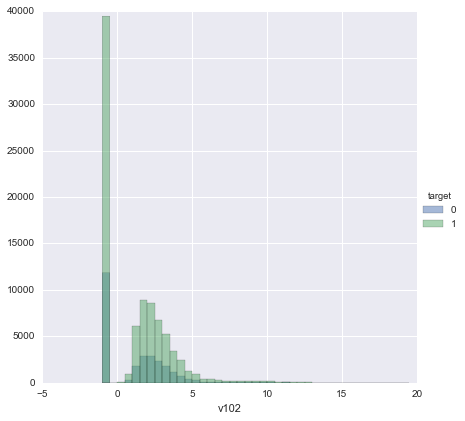

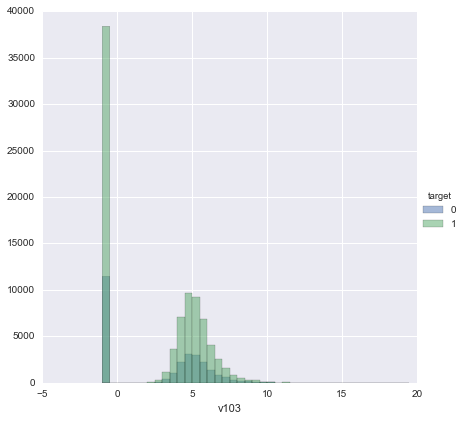

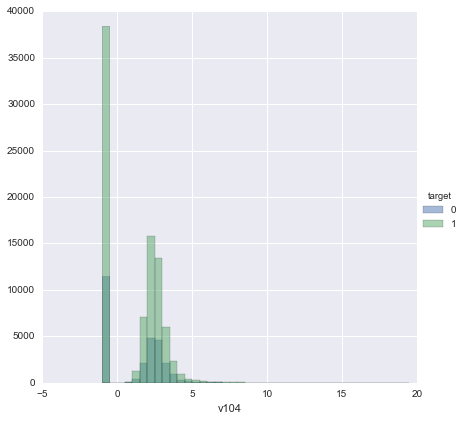

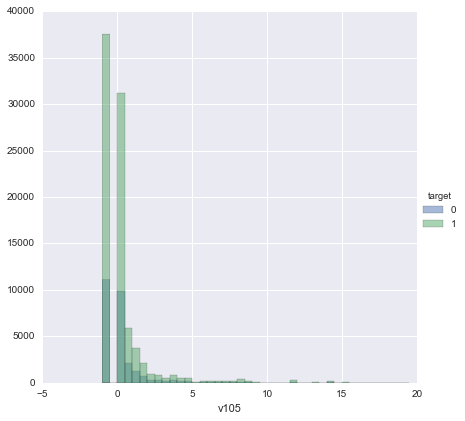

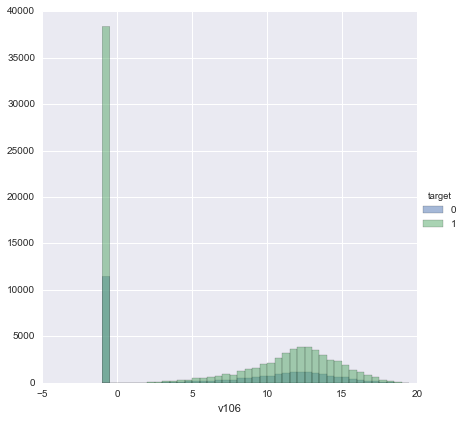

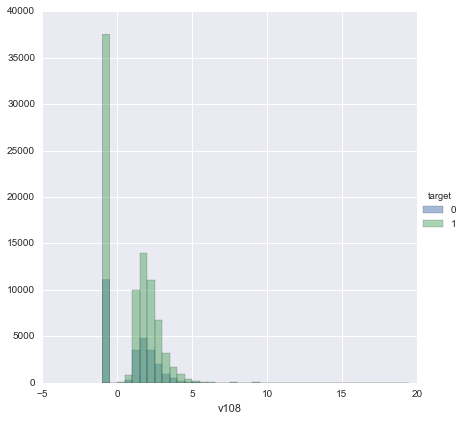

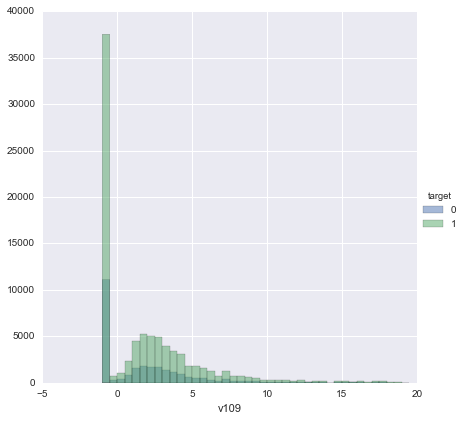

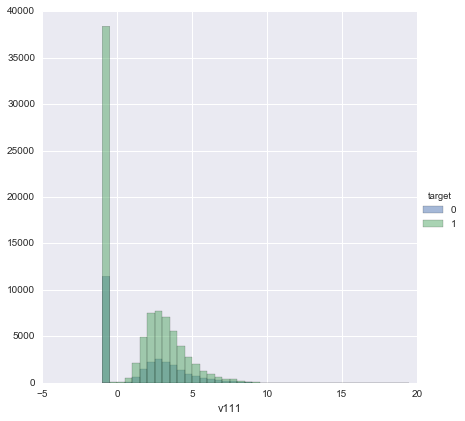

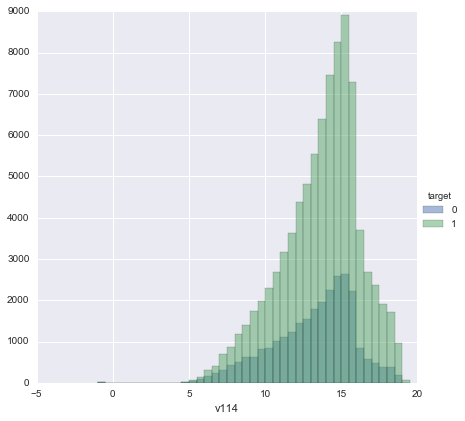

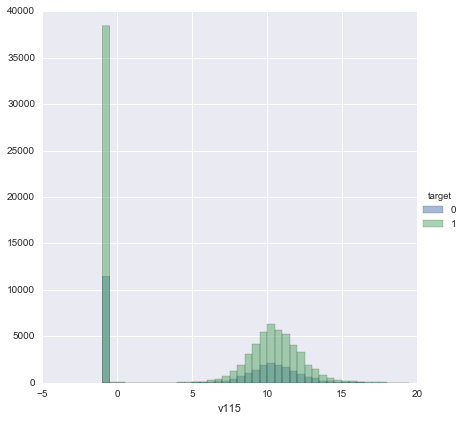

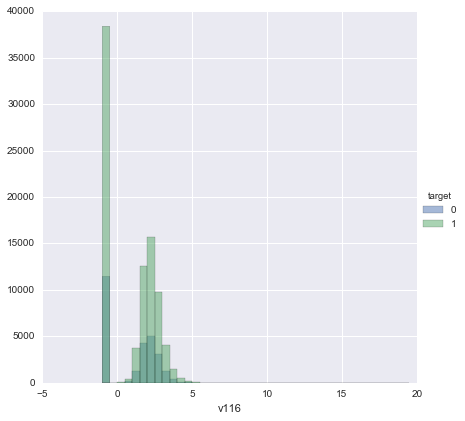

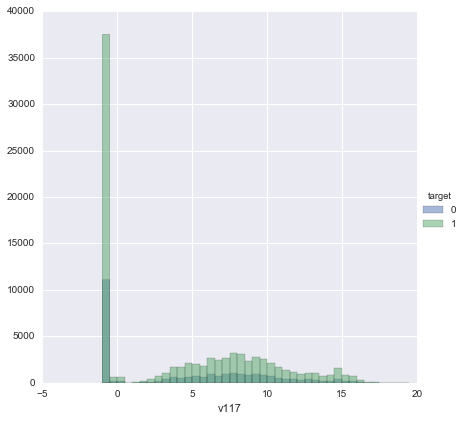

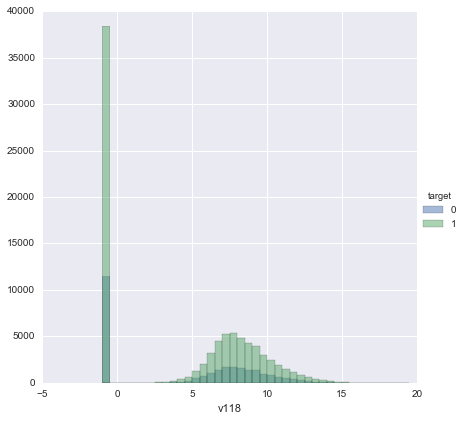

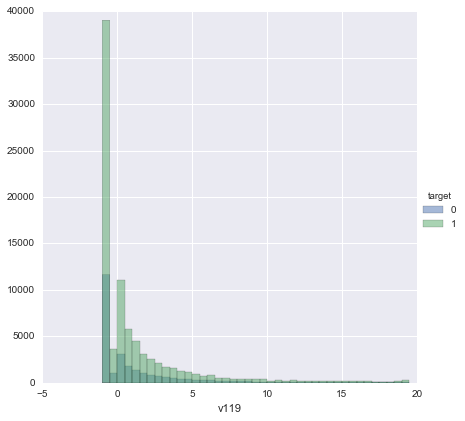

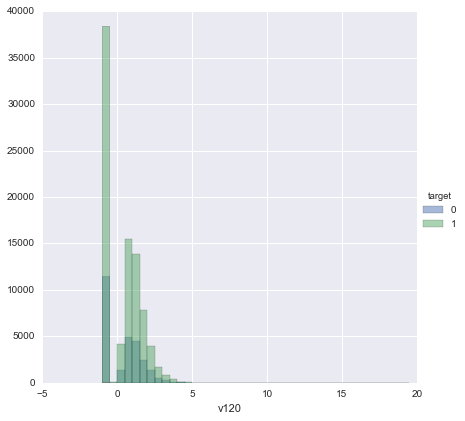

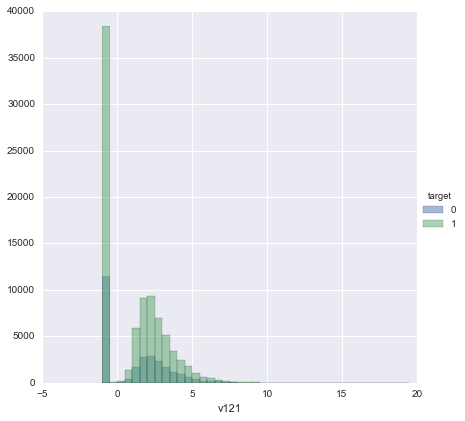

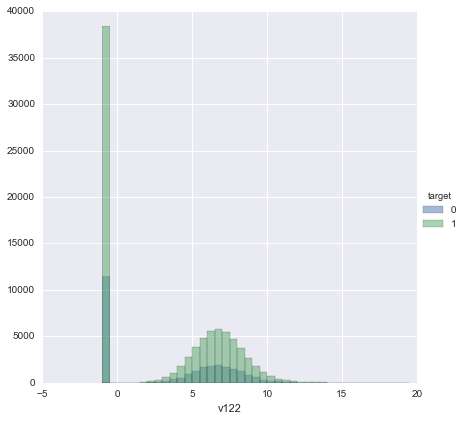

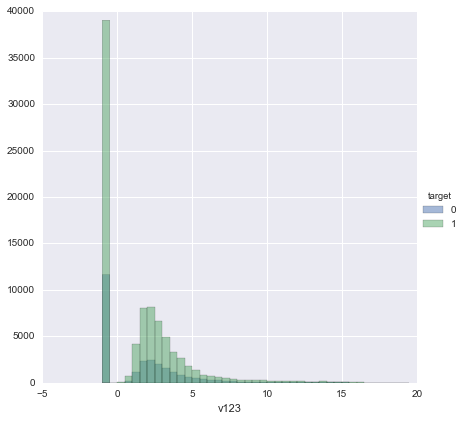

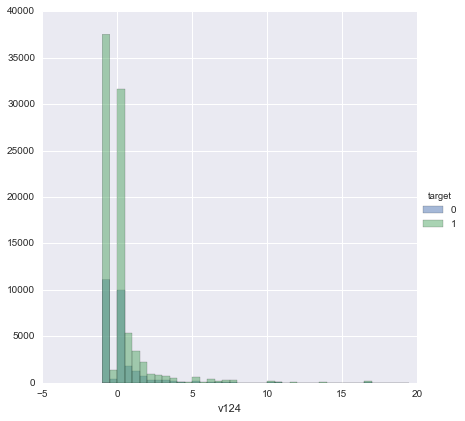

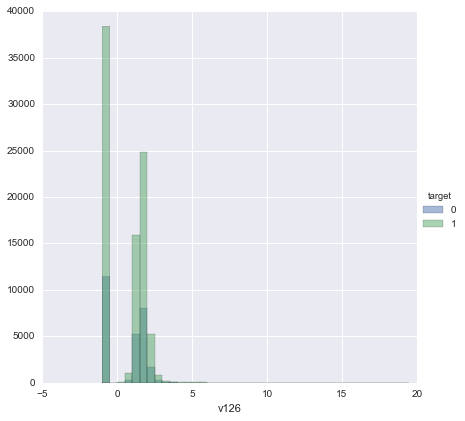

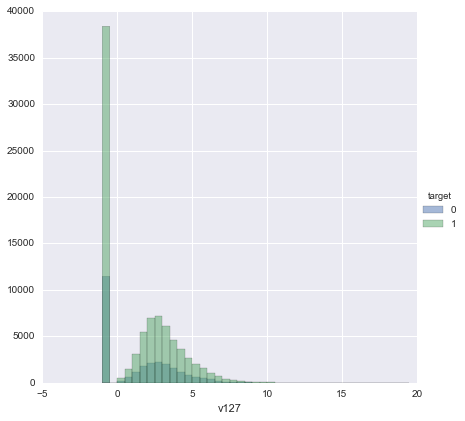

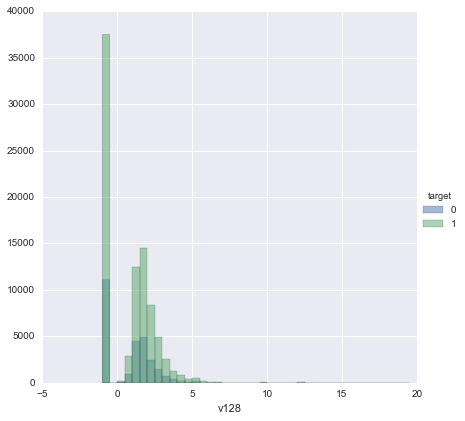

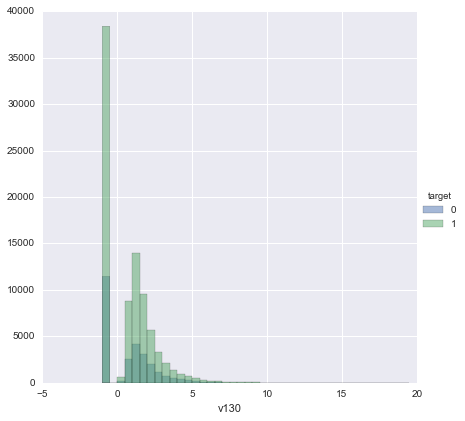

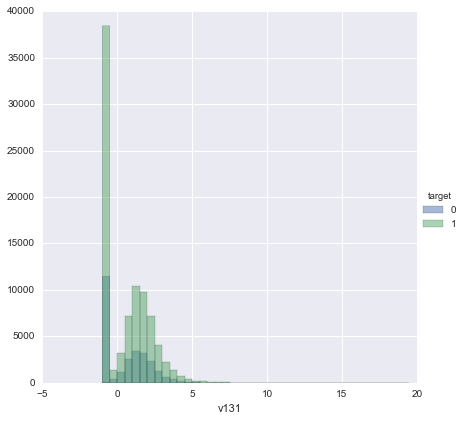

In [38]:
for col in train.columns[floats]:
    print(col)
    g = sns.FacetGrid(train[[col, 'target']].fillna(-1), hue="target", size=6)
    g.map(plt.hist, col, alpha=.5, bins=np.arange(-1, 20, .5))
    g.add_legend();

In [43]:
for col in train.columns[floats]:
    print(train[[col]].isnull().sum())

v1    49832
dtype: int64
v2    49796
dtype: int64
v4    49796
dtype: int64
v5    48624
dtype: int64
v6    49832
dtype: int64
v7    49832
dtype: int64
v8    48619
dtype: int64
v9    49851
dtype: int64
v10    84
dtype: int64
v11    49836
dtype: int64
v12    86
dtype: int64
v13    49832
dtype: int64
v14    4
dtype: int64
v15    49836
dtype: int64
v16    49895
dtype: int64
v17    49796
dtype: int64
v18    49832
dtype: int64
v19    49843
dtype: int64
v20    49840
dtype: int64
v21    611
dtype: int64
v23    50675
dtype: int64
v25    48619
dtype: int64
v26    49832
dtype: int64
v27    49832
dtype: int64
v28    49832
dtype: int64
v29    49832
dtype: int64
v32    49832
dtype: int64
v33    49832
dtype: int64
v34    111
dtype: int64
v35    49832
dtype: int64
v36    48624
dtype: int64
v37    49843
dtype: int64
v39    49836
dtype: int64
v40    111
dtype: int64
v41    49832
dtype: int64
v42    49832
dtype: int64
v43    49836
dtype: int64
v44    49796
dtype: int64
v45    49832
dtype: int64
v46    486

In [48]:
train[train.v10.isnull()].index

Int64Index([  4388,   7515,  17640,  17793,  18298,  23067,  23272,  24921,
             31383,  34227,  39921,  40355,  41045,  42006,  44334,  48047,
             48245,  48510,  51018,  56635,  57167,  59457,  61969,  63226,
             65811,  69633,  73639,  73680,  74864,  75915,  78776,  80475,
             84477,  88058,  89072,  89114,  93214,  93272, 100394, 100729,
            101949, 104078, 104753, 107648, 117195, 119018, 119394, 123483,
            124310, 131640, 138276, 139323, 139981, 142458, 143884, 156543,
            160423, 162046, 162563, 163823, 170993, 172734, 173179, 173475,
            176287, 179478, 179817, 189093, 194707, 195412, 195799, 197550,
            198351, 198456, 201949, 201993, 207647, 208667, 209482, 210719,
            219294, 221076, 221384, 225854],
           dtype='int64', name='ID')

In [49]:
train[train.v14.isnull()].index

Int64Index([23272, 119018, 124310, 179817], dtype='int64', name='ID')

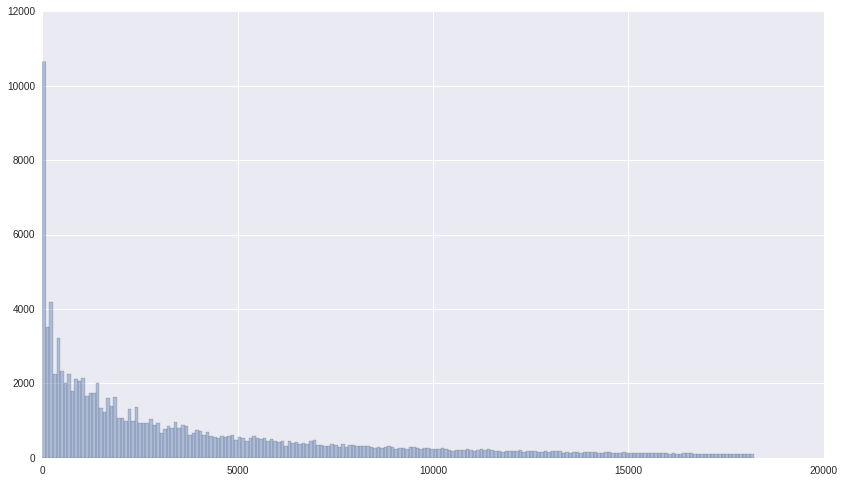

In [232]:
plt.figure(figsize=(14, 8))
sns.distplot(train.v22n.values, bins=200, kde=False, norm_hist=False)

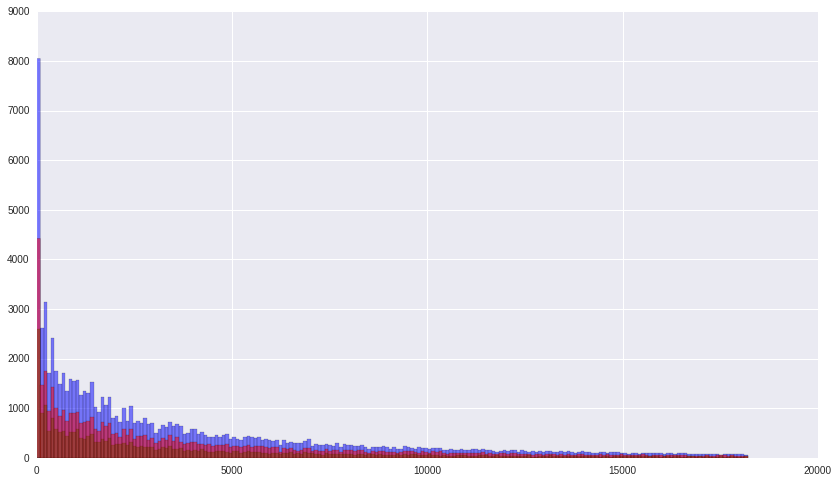

In [315]:
plt.figure(figsize=(14, 8))
z = plt.hist(train[train.target == 1].v22n.values, bins=200, color='blue', alpha=.5)
x = plt.hist(train[train.target == 0].v22n.values, bins=z[1], color='green', alpha=.5)
y = plt.hist(train[(train.isnull().sum(axis=1) > 60)].v22n.values, bins=z[1],
            color='red', alpha=.5)

In [313]:
train.columns.values

array(['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18',
       'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27',
       'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36',
       'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45',
       'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54',
       'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63',
       'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72',
       'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81',
       'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90',
       'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99',
       'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v108',
       'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116',
       'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124',
       'v125', '